#                 The Sparks Foundation
## ***GRIPNOV20 Data Science & Business Analyst Task***
### Prediction Using Supervised ML (Beginner)
### NAME: <font color='green'>KAMAKSHI</font>
### Task 1: Predict the percentage of an student based on the no. of study hours

### Importing Needed packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data in

In [3]:
data = pd.read_csv(r"C:\Users\kamakshi\Desktop\task\the spark foundation\Task 1\student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Exploration
Lets first have a descriptive exploration on our data.

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualization of Data

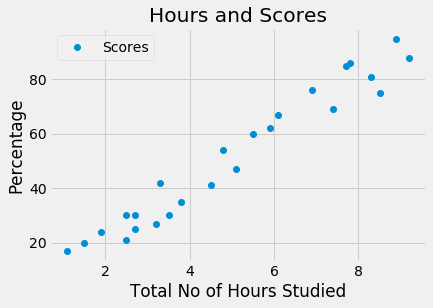

In [6]:
plt.style.use('fivethirtyeight')
data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours and Scores")
plt.xlabel("Total No of Hours Studied")
plt.ylabel("Percentage")
plt.show()

#### Lineplot between Hours Studied and Percentage


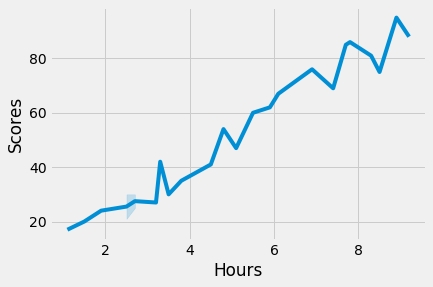

In [7]:
sns.lineplot(data.Hours,data.Scores)

It is clear that this problem can be solved with the help of Simple Linear Regression.

#### Distribution plot of Independent variable

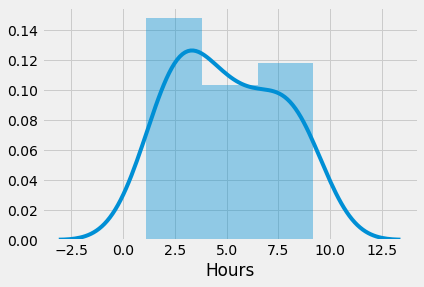

In [8]:
# To plot the univariate distribution of the observation
sns.distplot(data.Hours)

#### Distribution plot of dependent variable

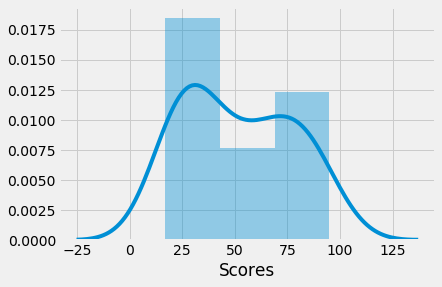

In [9]:
sns.distplot(data.Scores)

#### Correlation Plot

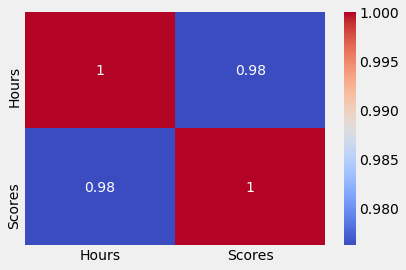

In [12]:
cor = data.corr()
sns.heatmap(cor,annot = True,cmap = 'coolwarm')

#### Simple Regression
- Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

### **Preparing the data**
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
print(X[0:5])
print(Y[0:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
[21 47 27 75 30]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)
print("shape of training set:",X_train.shape,y_train.shape)
print("shape of testing set:",X_test.shape,y_test.shape)

shape of training set: (20, 1) (20,)
shape of testing set: (5, 1) (5,)


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [15]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression(n_jobs =-1)
Regressor.fit(X_train,y_train)
print("Training complete")


Training complete


In [16]:
m= Regressor.coef_
c = Regressor.intercept_
print('Slope:',m)
print('Intercept:',c)

Slope: [10.46110829]
Intercept: -1.5369573315500702


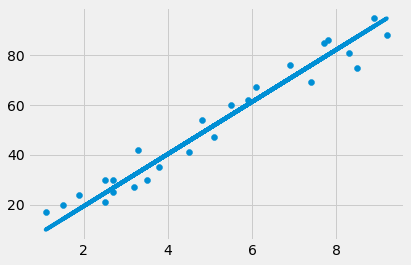

In [17]:
# Plotting the regression line
line = Regressor.coef_*X+Regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [18]:
y_pred = Regressor.predict(X_test)
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics
me1=metrics.mean_absolute_error(y_test,y_pred)
r1 = metrics.r2_score(y_pred,y_test)
print("Mean Absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2-score: %.2f" % metrics.r2_score(y_pred,y_test) )

Mean Absolute error: 7.882398086270432
R2-score: 0.91


**Question** 
- What will be the prediction score if the student studies for 9.25hr/day?

In [20]:
hours = np.array([9.25]).reshape((-1,1))

own_pred = Regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 95.22829438402952


## Gradient Descent Algorithm
- Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.
- In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$$ Y = mX + c $$
- Let's try applying gradient descent to m (Slope) and c(Intercept) and approach it step by step:

- Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
- Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.
- $$ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) $$$$ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) $$
 $D_m$ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, $D_c$ :
$$ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) $$
Now we update the current value of m and c using the following equation:$$ m = m - L \times D_m$$
$$ c = c - L \times D_c$$
We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

In [10]:
x = data.iloc[0:,0]
y = data.iloc[:,1]
print(x[0:5])
print(y[0:5])

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64
0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


In [11]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

9.896964110671043 1.6314708810783134


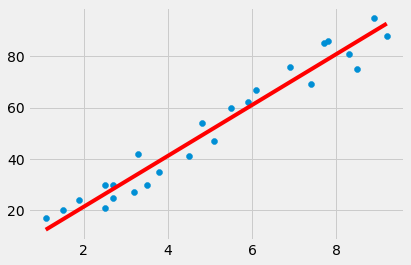

In [46]:
Y_pred = m*x + c

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [49]:
df = pd.DataFrame({'Actual':y,'Prediction':Y_pred})
df

,Actual,Prediction
0,21,26.373881
1,47,52.105988
2,27,33.301756
3,75,85.755666
4,30,36.270845
5,20,16.476917
6,88,92.683541
7,60,56.064773
8,81,83.776273
9,25,28.353274


In [70]:
from sklearn import metrics
me2 = metrics.mean_absolute_error(y,Y_pred)
print("Mean Absolute error:",metrics.mean_absolute_error(y,Y_pred))

Mean Absolute error: 5.0367828352985535


In [71]:
print("R2-score: %.2f" % metrics.r2_score(Y_pred,y) )
r2 = metrics.r2_score(Y_pred,y)

R2-score: 0.95


Text(0, 0.5, 'Percentage')

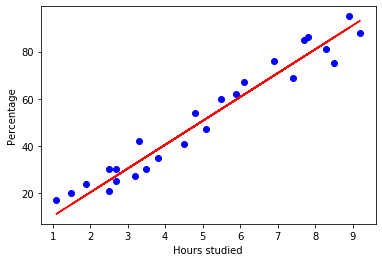

In [58]:
plt.scatter(data.Hours,data.Scores,  color='blue')
plt.plot(X, c*X + s, '-r')
plt.xlabel("Hours studied")
plt.ylabel("Percentage")

In [13]:
h=9.25
Percentage = m*h + c
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(Percentage))

No of Hours = 9.25
Predicted Score = 93.17838890478546


In [73]:
Report = pd.DataFrame({'Model':['Linear Regression','Gradient Descent'],'Mean Absolute Error':[me1,me2],'R2 Score':[r1,r2]})
Report

,Model,Mean Absolute Error,R2 Score
0,Linear Regression,7.882398,0.907893
1,Gradient Descent,5.036783,0.951577
